In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


### machine learning

In [2]:
population_clean = pd.read_csv(r'population_clean.csv')

In [3]:
population_clean.sample(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,...,Others of concern,Total forced displacements,Continent_of_Asylum,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
112545,1997,Ethiopia,ETH,Uganda,UGA,25,0,0,0,0,...,0,25,Africa,Eastern Africa,Africa,Eastern Africa,32.0,1.0,38.0,8.0
68094,2010,Rwanda,RWA,Eswatini,SWZ,108,0,0,0,0,...,0,108,Africa,Southern Africa,Africa,Eastern Africa,31.5,-26.5,30.0,-2.0
82444,2007,Azerbaijan,AZE,Canada,CAN,727,27,0,0,0,...,0,754,Americas,Northern America,Asia,Western Asia,-95.0,60.0,47.5,40.5
121203,1989,Unknown,UNK,Brazil,BRA,5331,0,0,0,0,...,0,5331,Americas,South America,NaN,NaN,-55.0,-10.0,NaN,NaN
13023,2021,Mali,MLI,Tunisia,TUN,14,106,0,0,0,...,0,120,Africa,Northern Africa,Africa,Western Africa,9.0,34.0,-4.0,17.0


In [4]:
population_clean['Continent_of_Asylum'].unique()

array(['Europe', 'Asia', 'Africa', 'Americas', 'Oceania', nan],
      dtype=object)

In [5]:
def get_continent_df(continent):
    df = pd.DataFrame(population_clean[population_clean['Continent_of_Asylum'] == continent].groupby(['Year'])['Total forced displacements'].sum())
    return df


In [6]:
europe = get_continent_df('Europe')
asia = get_continent_df('Asia')
africa = get_continent_df('Africa')
americas = get_continent_df('Americas')
oceania = get_continent_df('Oceania')


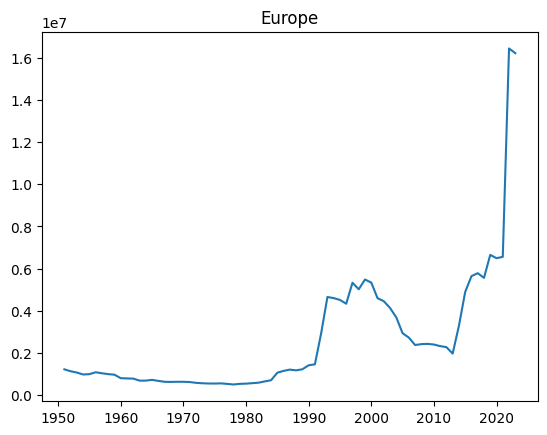

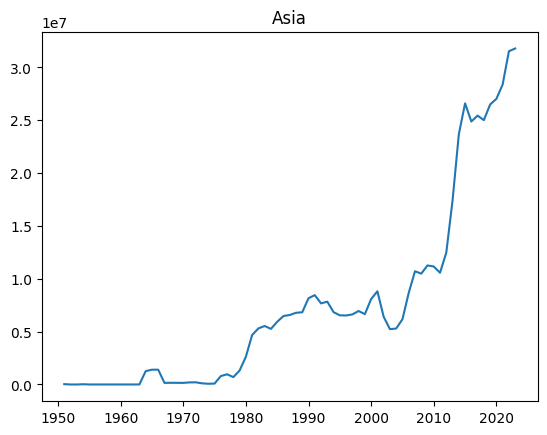

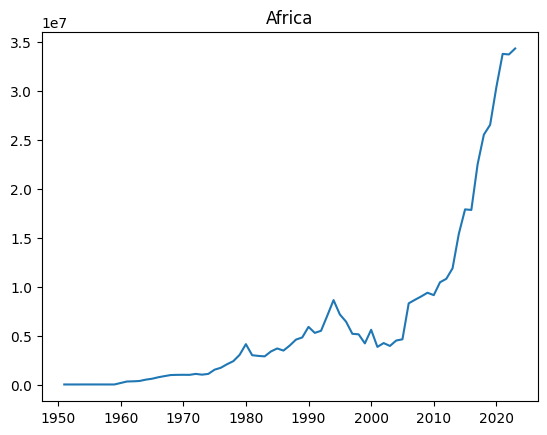

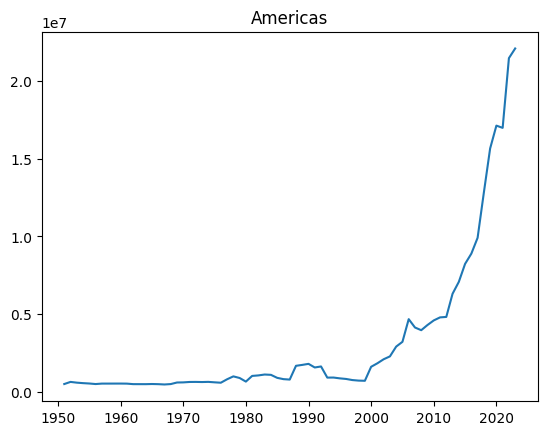

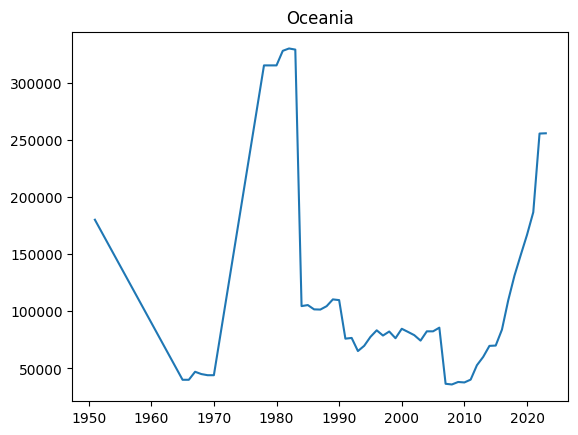

In [7]:
list_cont = [europe, asia, africa, americas, oceania]
list_cont_names = ['Europe', 'Asia', 'Africa', 'Americas', 'Oceania']
#una grafica individual para cada continente en list_cont en graficos diferentes
for cont, cont_name in zip(list_cont, list_cont_names):
    plt.plot(cont)
    plt.title(cont_name)
    plt.show()

In [8]:
for cont, cont_name in zip(list_cont, list_cont_names):
    print(cont_name)
    print(f"p-value for zeroth order differencing: {adfuller(cont['Total forced displacements'])[1]}")
    print(f"p-value for first order differencing: {adfuller(cont['Total forced displacements'].diff().dropna())[1]}")
    print(f"p-value for second order differencing: {adfuller(cont['Total forced displacements'].diff().diff().dropna())[1]}")
    print(f"p-value for second order differencing: {adfuller(cont['Total forced displacements'].diff().diff().diff().dropna())[1]}")


Europe
p-value for zeroth order differencing: 0.9851082892936008
p-value for first order differencing: 0.9403388434754641
p-value for second order differencing: 0.13549836260033943
p-value for second order differencing: 1.8775415494322424e-07
Asia
p-value for zeroth order differencing: 0.9919806770272327
p-value for first order differencing: 0.03363999080996998
p-value for second order differencing: 1.0914390703089185e-08
p-value for second order differencing: 3.522350612583787e-11
Africa
p-value for zeroth order differencing: 1.0
p-value for first order differencing: 0.639814331033949
p-value for second order differencing: 1.7048160618019637e-06
p-value for second order differencing: 5.122925722164213e-06
Americas
p-value for zeroth order differencing: 1.0
p-value for first order differencing: 0.9986073002445519
p-value for second order differencing: 0.004173890120702627
p-value for second order differencing: 0.02569822744978082
Oceania
p-value for zeroth order differencing: 0.2848423

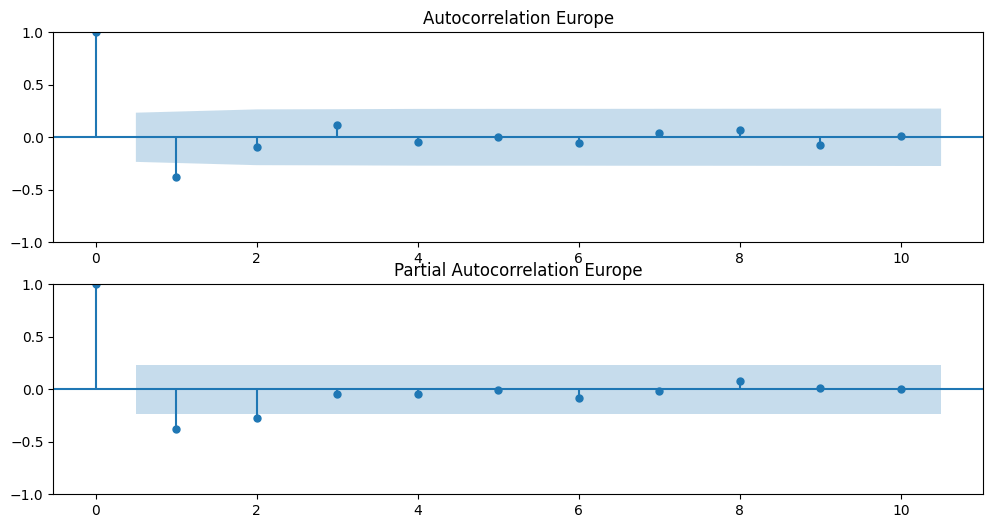

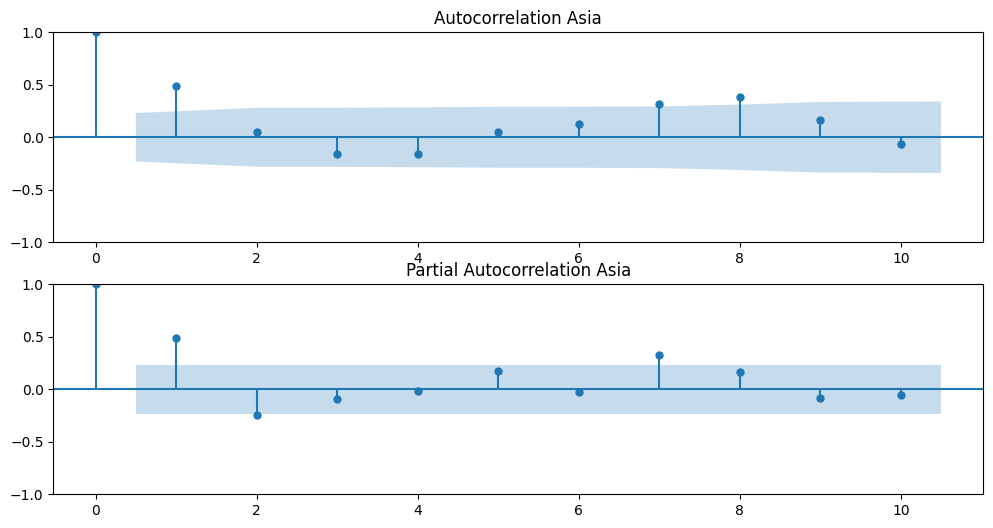

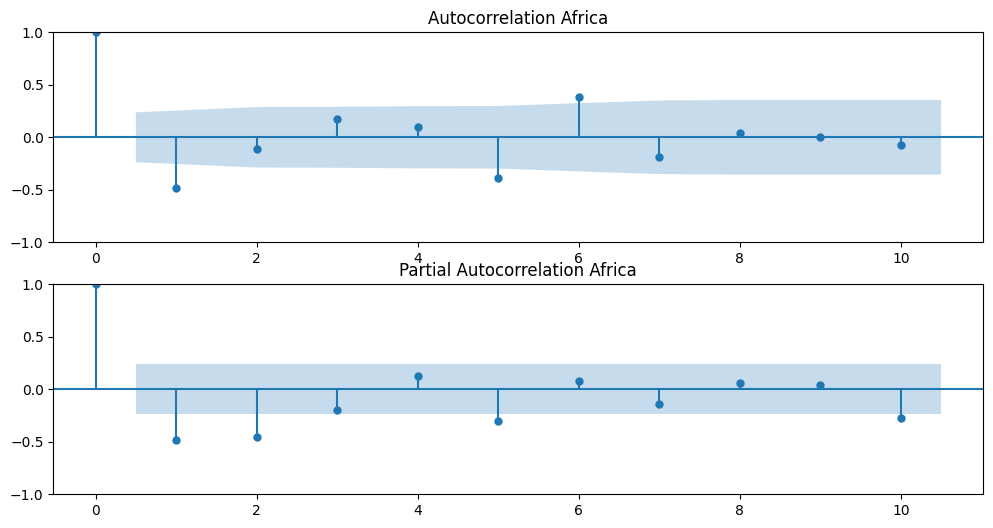

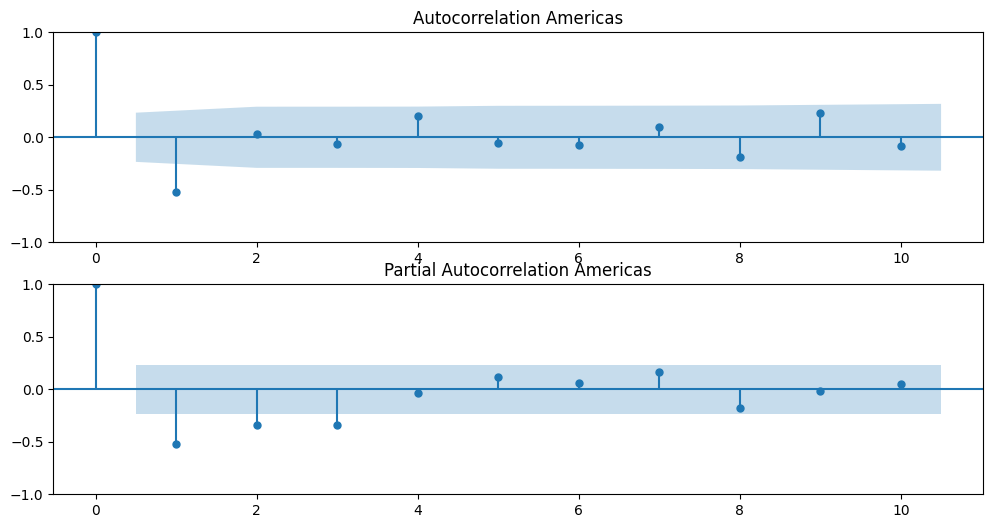

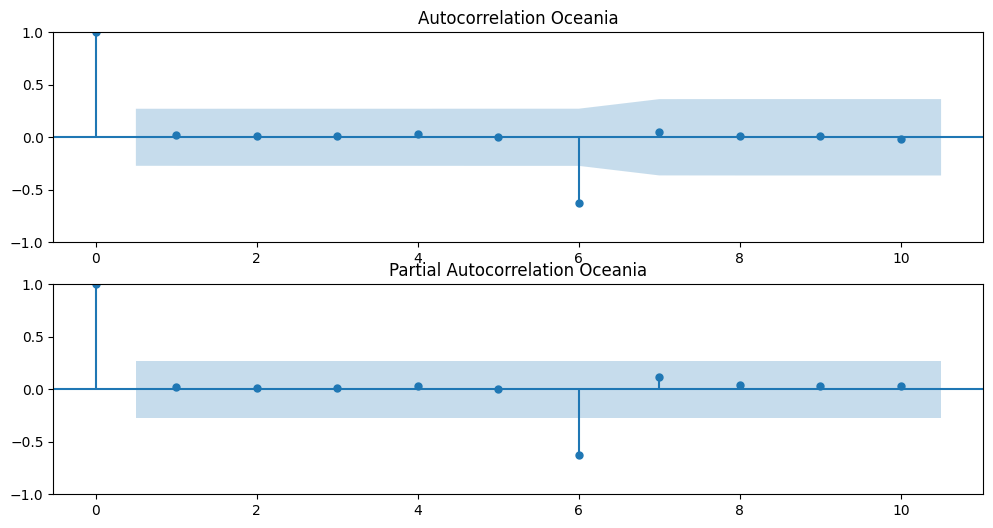

In [9]:
# Aplicar la tercera diferenciación
europe_diff = europe['Total forced displacements'].diff().diff().diff().dropna()
asi_diff = asia['Total forced displacements'].diff().dropna() 
africa_diff = africa['Total forced displacements'].diff().diff().dropna()
americas_diff = americas['Total forced displacements'].diff().diff().diff().dropna()
oceania_diff = oceania['Total forced displacements'].diff().dropna()
list_diff = [europe_diff, asi_diff, africa_diff, americas_diff, oceania_diff] 

list_cont_names = ['Europe', 'Asia', 'Africa', 'Americas', 'Oceania']

for cont, cont_name in zip(list_diff, list_cont_names):
# Graficar la autocorrelación y autocorrelación parcial
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(cont, lags=10, ax=plt.gca(), title='Autocorrelation'+ ' ' + cont_name)

    plt.subplot(2, 1, 2)
    plot_pacf(cont, lags=10, ax=plt.gca(), title='Partial Autocorrelation'+ ' ' + cont_name)

    plt.show()


In [10]:
#Anotamos los valores de p y q que nos parecen adecuados para cada continente:
europe_values =(1,3,1)
asia_values = (3,1,3)
africa_values=(4,3,2)
america_values = (3,3,1)
oceania_values=(1,1,1)

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(1, 3, 1)   Log Likelihood               -1090.905
Date:                        Sun, 26 Nov 2023   AIC                           2187.809
Time:                                00:06:38   BIC                           2194.555
Sample:                                     0   HQIC                          2190.489
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9216      0.247     -3.729      0.000      -1.406      -0.437
ma.L1         -0.9605      0.224     -4.290      0.000      -1.399 

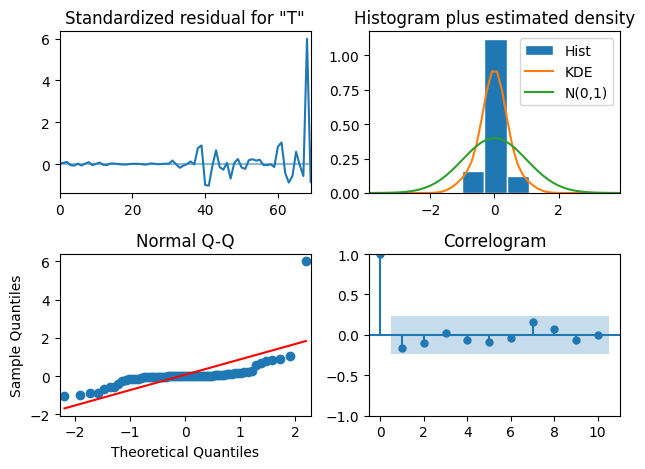

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


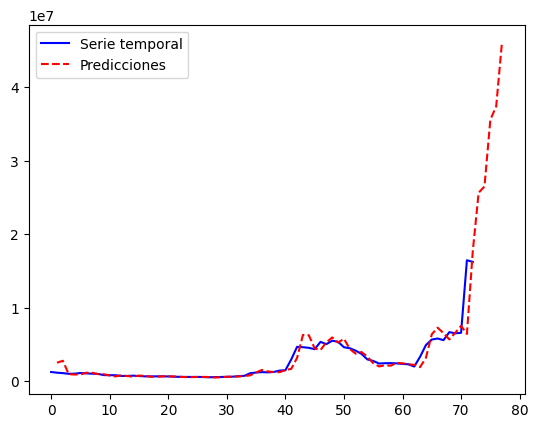

In [30]:
def modelo_arima(df, p, d, q):
    df.index.freq = 'AS' 
    model = ARIMA(df, order=(p,d,q))
    model_fit = model.fit()
    print(model_fit.summary())
    print('')
    model_fit.plot_diagnostics()
    plt.tight_layout()
    plt.show()
    predictions = model_fit.predict()
    fig, ax = plt.subplots()
    ax.plot(range(len(df)), df.values, 'b-')
    ax.plot(range(1,len(df)+5), pd.concat([predictions[1:],model_fit.forecast(5)]), 'r--')
    plt.legend(['Serie temporal', 'Predicciones'])
    plt.show()
    return model_fit
modelo_arima(europe, 1, 3, 1)



c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ioana

                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(3, 1, 3)   Log Likelihood               -1100.843
Date:                        Sun, 26 Nov 2023   AIC                           2215.686
Time:                                00:07:51   BIC                           2231.623
Sample:                                     0   HQIC                          2222.031
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9887      0.245     -4.034      0.000      -1.469      -0.508
ar.L2         -0.5495      0.246     -2.230      0.026      -1.032 

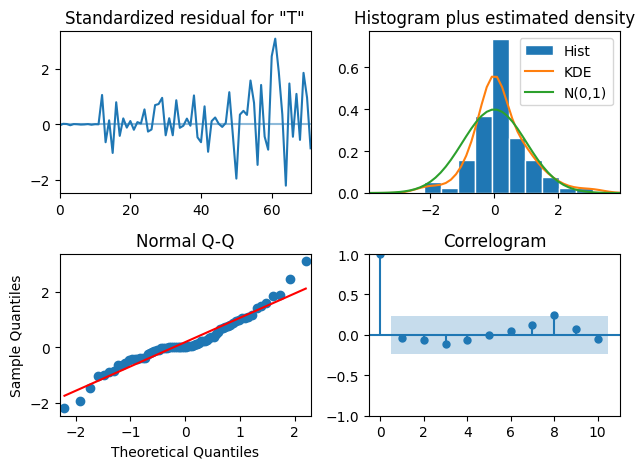

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


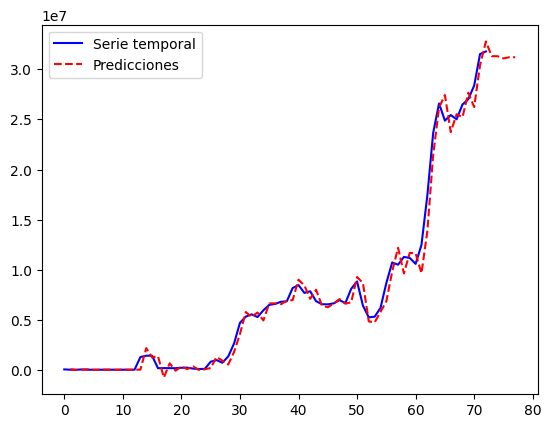

In [31]:
modelo_arima(asia, 3, 1, 3)


c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ioana

                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   70
Model:                         ARIMA(4, 3, 2)   Log Likelihood               -1025.778
Date:                        Sun, 26 Nov 2023   AIC                           2065.556
Time:                                00:08:05   BIC                           2080.989
Sample:                                     0   HQIC                          2071.663
                                         - 70                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3140      0.341     -3.854      0.000      -1.982      -0.646
ar.L2         -0.9716      0.363     -2.675      0.007      -1.684 

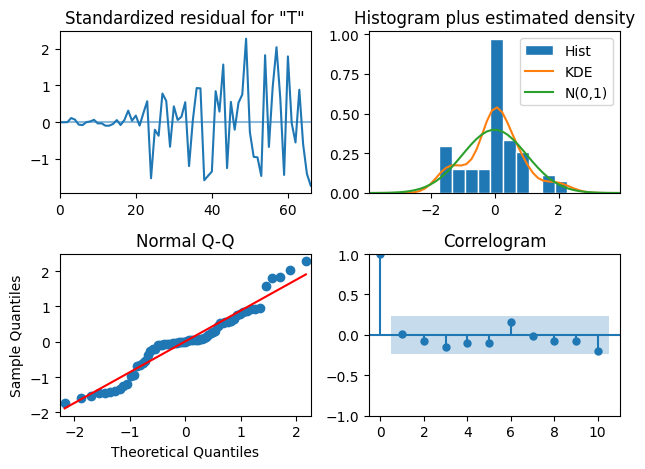

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


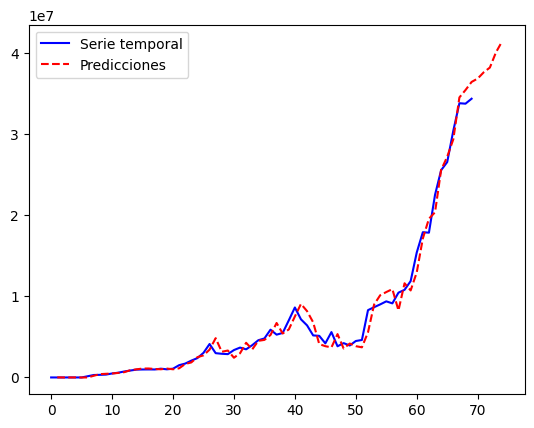

In [32]:
modelo_arima(africa, 4, 3, 2)


c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(3, 3, 1)   Log Likelihood               -1036.775
Date:                        Sun, 26 Nov 2023   AIC                           2083.551
Time:                                00:08:21   BIC                           2094.793
Sample:                                     0   HQIC                          2088.016
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0554      0.101    -10.469      0.000      -1.253      -0.858
ar.L2         -0.7860      0.182     -4.329      0.000      -1.142 

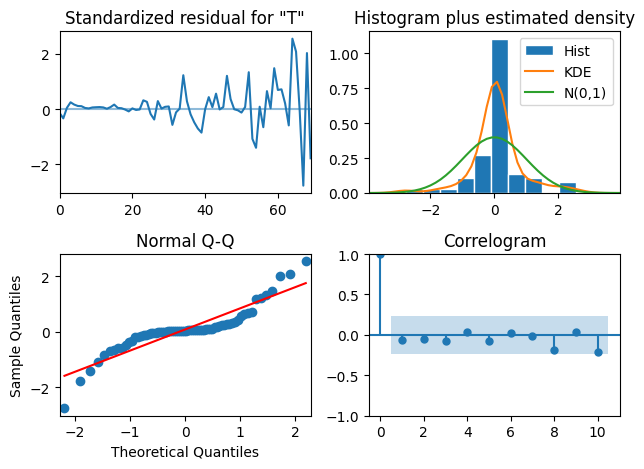

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


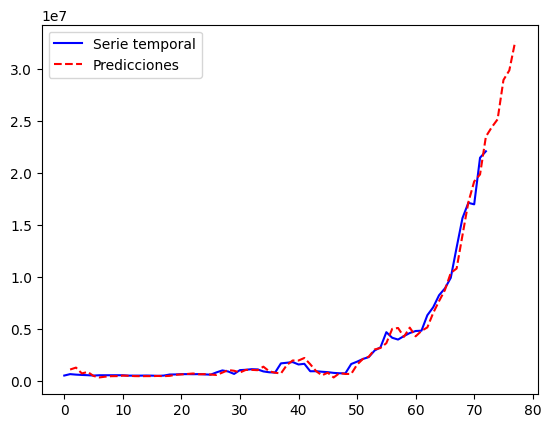

In [33]:
modelo_arima(americas, 3, 3, 1)


c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   53
Model:                         ARIMA(1, 1, 1)   Log Likelihood                -639.692
Date:                        Sun, 26 Nov 2023   AIC                           1285.384
Time:                                00:08:34   BIC                           1291.238
Sample:                                     0   HQIC                          1287.628
                                         - 53                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8389      0.094      8.900      0.000       0.654       1.024
ma.L1         -0.9975      0.094    -10.581      0.000      -1.182 

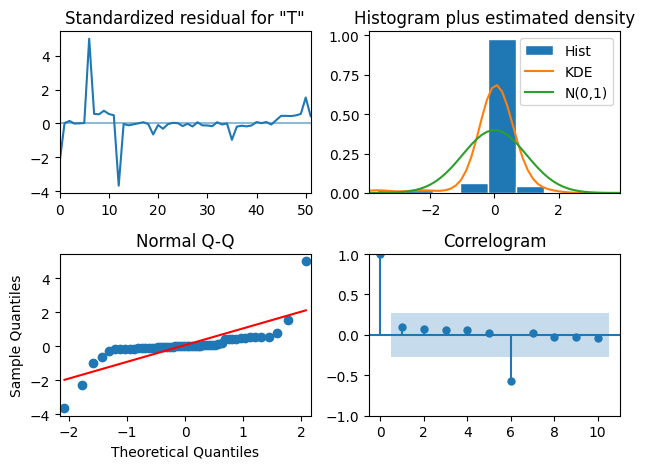

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


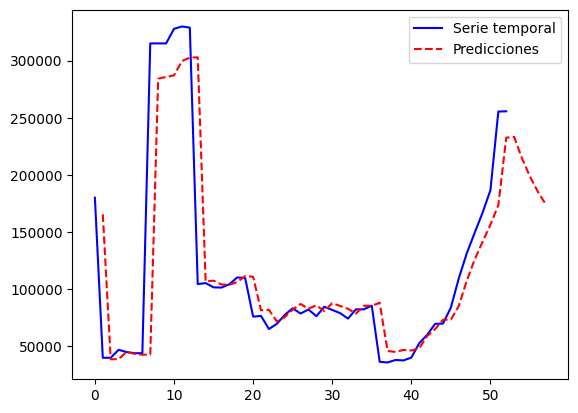

In [34]:
modelo_arima(oceania, 1, 1, 1)

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Europe
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(1, 3, 1)   Log Likelihood               -1090.905
Date:                        Sun, 26 Nov 2023   AIC                           2187.809
Time:                                00:22:23   BIC                           2194.555
Sample:                                     0   HQIC                          2190.489
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9216      0.247     -3.729      0.000      -1.406      -0.437
ma.L1         -0.9605      0.224     -4.290      0.000      

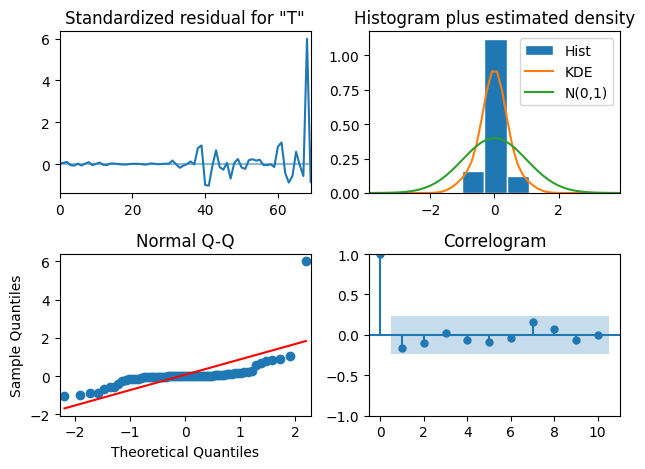

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


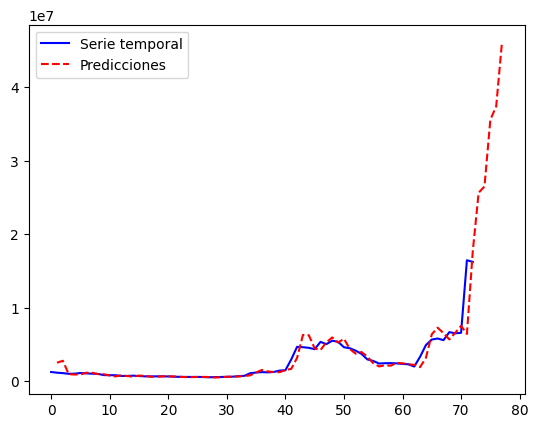

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ioana

Asia
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(3, 1, 3)   Log Likelihood               -1100.843
Date:                        Sun, 26 Nov 2023   AIC                           2215.686
Time:                                00:22:24   BIC                           2231.623
Sample:                                     0   HQIC                          2222.031
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9887      0.245     -4.034      0.000      -1.469      -0.508
ar.L2         -0.5495      0.246     -2.230      0.026      -1

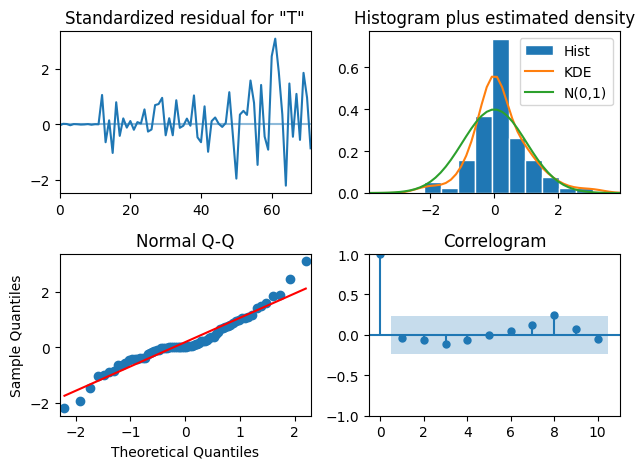

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


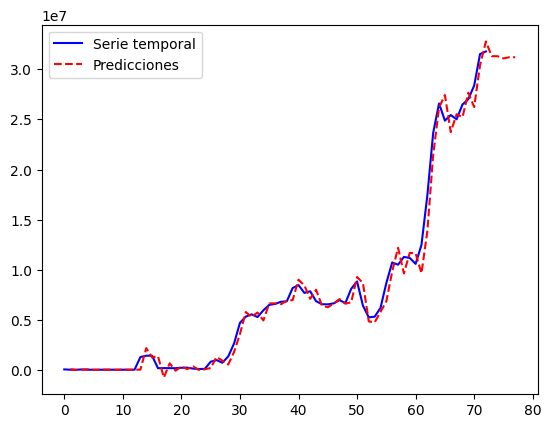

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ioana

Africa
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   70
Model:                         ARIMA(4, 3, 2)   Log Likelihood               -1025.778
Date:                        Sun, 26 Nov 2023   AIC                           2065.556
Time:                                00:22:26   BIC                           2080.989
Sample:                                     0   HQIC                          2071.663
                                         - 70                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3140      0.341     -3.854      0.000      -1.982      -0.646
ar.L2         -0.9716      0.363     -2.675      0.007      

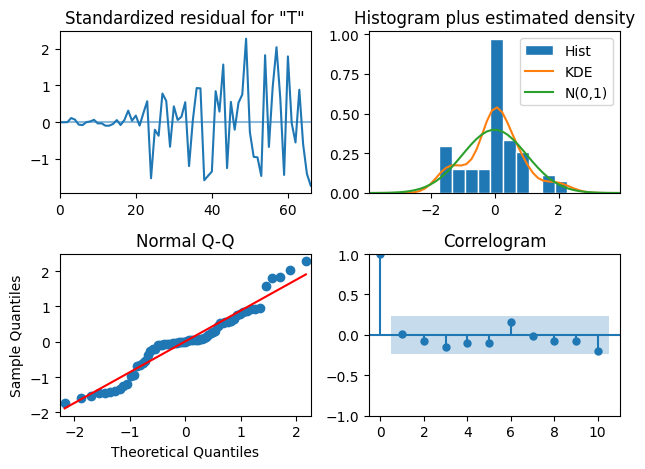

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


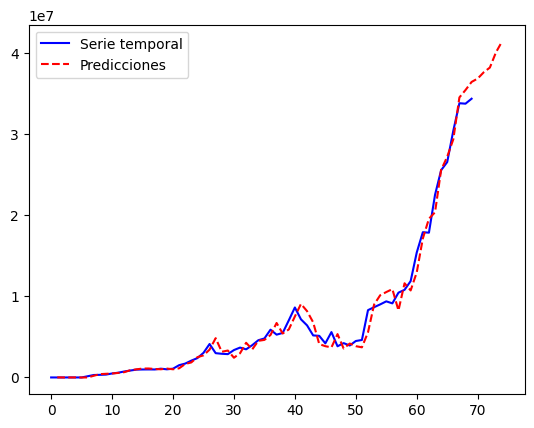

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Americas
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(3, 3, 1)   Log Likelihood               -1036.775
Date:                        Sun, 26 Nov 2023   AIC                           2083.551
Time:                                00:22:27   BIC                           2094.793
Sample:                                     0   HQIC                          2088.016
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0554      0.101    -10.469      0.000      -1.253      -0.858
ar.L2         -0.7860      0.182     -4.329      0.000    

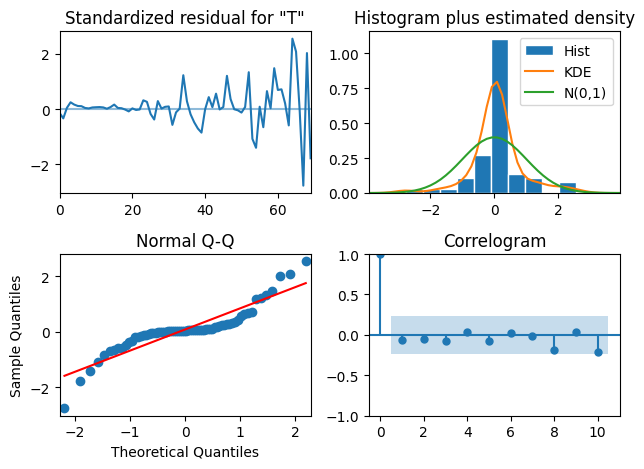

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


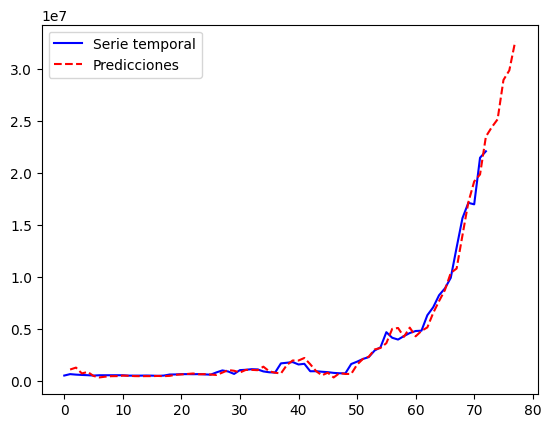

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Oceania
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   53
Model:                         ARIMA(1, 1, 1)   Log Likelihood                -639.692
Date:                        Sun, 26 Nov 2023   AIC                           1285.384
Time:                                00:22:29   BIC                           1291.238
Sample:                                     0   HQIC                          1287.628
                                         - 53                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8389      0.094      8.900      0.000       0.654       1.024
ma.L1         -0.9975      0.094    -10.581      0.000     

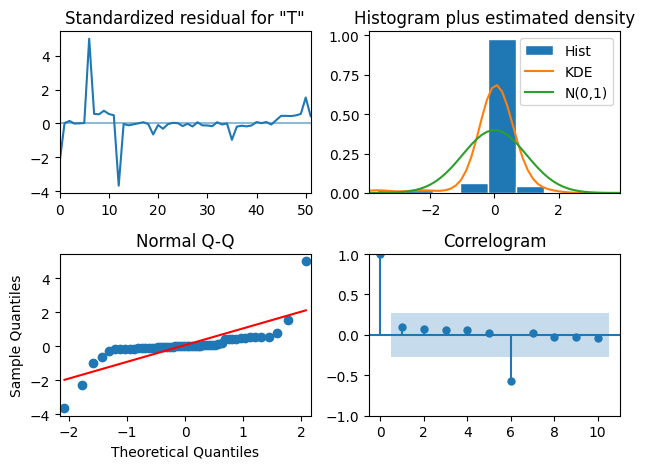

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


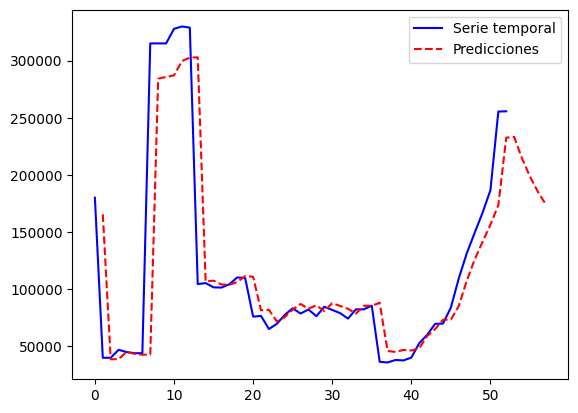

In [45]:
list_cont_values = [(1, 3, 1), (3, 1, 3), (4, 3, 2), (3, 3, 1), (1, 1, 1)]
list_cont_names = ['Europe', 'Asia', 'Africa', 'Americas', 'Oceania']
list_cont = [europe, asia, africa, americas, oceania]

for cont, cont_name, cont_values in zip(list_cont, list_cont_names, list_cont_values): 

    model = ARIMA(cont, order=cont_values)
    model_fit = model.fit()
    
    print(cont_name)
    print(model_fit.summary())
    print('')
    
    # Calcular el error
    model_fit.plot_diagnostics()
    plt.tight_layout()
    plt.show()

    # Plotting the original series and predictions
    predictions = model_fit.predict()
    fig, ax = plt.subplots()
    ax.plot(range(len(cont)), cont.values, 'b-')
    ax.plot(range(1,len(cont)+5), pd.concat([predictions[1:],model_fit.forecast(5)]), 'r--')
    ax.set_title = ( cont_name)
    plt.legend(['Serie temporal', 'Predicciones'])
    plt.show()
    
    
